<a href="https://colab.research.google.com/github/AishlyManglani/Data-Mining-Assignments/blob/main/KDD/KDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the dataset
url = '/content/heart_disease_uci.csv'
heart_data = pd.read_csv(url)

# Display the first few rows of the dataset
print(heart_data.head())


   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  


In [2]:
# Check for missing values
print(heart_data.isnull().sum())

# As there are no missing values in this dataset, we can proceed to conversion
# Check data types
print(heart_data.dtypes)

# Convert 'cp', 'restecg', 'slope', 'thal' into categorical types if needed
heart_data['cp'] = heart_data['cp'].astype('category')
heart_data['restecg'] = heart_data['restecg'].astype('category')
heart_data['slope'] = heart_data['slope'].astype('category')
heart_data['thal'] = heart_data['thal'].astype('category')

# Display the cleaned data types
print(heart_data.dtypes)


id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64
id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object
id             int64
age            int64
sex           object
dataset       object
cp          category
trestbps     float64
chol         float64
fbs           object
restecg     category
thalch       float64
exang         object
oldpeak      float64
slope       category
ca           float64
thal        category
num            int64
dtype: object


In [4]:
from sklearn.preprocessing import StandardScaler

# Normalize the numerical features
numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
scaler = StandardScaler()
heart_data[numerical_cols] = scaler.fit_transform(heart_data[numerical_cols])

print(heart_data.head())


   id       age     sex    dataset               cp  trestbps      chol  \
0   1  1.007386    Male  Cleveland   typical angina  0.675287  0.305908   
1   2  1.432034    Male  Cleveland     asymptomatic  1.462483  0.784599   
2   3  1.432034    Male  Cleveland     asymptomatic -0.636705  0.269780   
3   4 -1.752828    Male  Cleveland      non-anginal -0.111908  0.459450   
4   5 -1.328180  Female  Cleveland  atypical angina -0.111908  0.043982   

     fbs         restecg    thalch  exang   oldpeak        slope   ca  \
0   True  lv hypertrophy  0.480653  False  1.303159  downsloping  0.0   
1  False  lv hypertrophy -1.140262   True  0.569611         flat  3.0   
2  False  lv hypertrophy -0.329805   True  1.578239         flat  2.0   
3  False          normal  1.908602  False  2.403480  downsloping  0.0   
4  False  lv hypertrophy  1.329704  False  0.477918    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1 

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and test sets
X = heart_data.drop(['id', 'dataset', 'num'], axis=1)  # Dropping columns that are not features
y = heart_data['num']                                   # Using 'num' as the target variable

# Convert categorical columns to numeric if necessary
X = pd.get_dummies(X, drop_first=True)  # One-hot encoding for categorical variables

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy: 0.5978260869565217
              precision    recall  f1-score   support

           0       0.71      0.91      0.80        75
           1       0.54      0.61      0.57        54
           2       0.33      0.16      0.22        25
           3       0.36      0.19      0.25        26
           4       0.00      0.00      0.00         4

    accuracy                           0.60       184
   macro avg       0.39      0.37      0.37       184
weighted avg       0.54      0.60      0.56       184



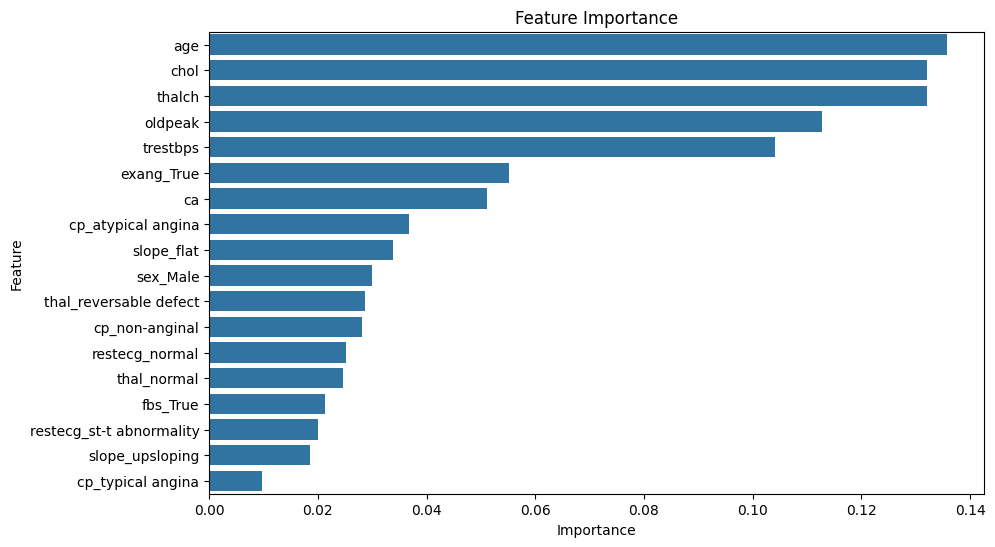

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance
feature_importance = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})

# Sort the values
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()


In [11]:
# Display the importance of features in a tabular format
print(importance_df)

# You can save your model or results to a file for later use
import joblib
joblib.dump(model, 'heart_disease_rf_model.pkl')


                     Feature  Importance
0                        age    0.135790
2                       chol    0.132126
3                     thalch    0.132070
4                    oldpeak    0.112822
1                   trestbps    0.104173
13                exang_True    0.055080
5                         ca    0.051064
7         cp_atypical angina    0.036850
14                slope_flat    0.033747
6                   sex_Male    0.030023
17    thal_reversable defect    0.028724
8             cp_non-anginal    0.028071
11            restecg_normal    0.025184
16               thal_normal    0.024575
10                  fbs_True    0.021257
12  restecg_st-t abnormality    0.020105
15           slope_upsloping    0.018526
9          cp_typical angina    0.009814


['heart_disease_rf_model.pkl']